In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Load the dataset
data = pd.read_csv('Admission_Predict.csv')

# Display basic info and statistics
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None
        Serial No   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min 

In [2]:
data.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

In [4]:
print(data.isnull().sum())

Serial_No            0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64


In [5]:
data.drop_duplicates(inplace=True)

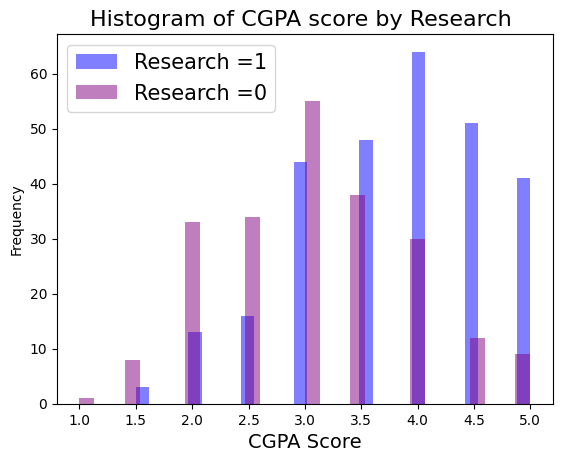

In [6]:
data[data['Research']==1]['LOR'].plot.hist(bins=30,alpha=0.5,color='blue', label='Research =1')
data[data['Research']==0]['LOR'].plot.hist(bins=30,alpha=0.5, color='purple', label='Research =0')
plt.legend(fontsize=15)
plt.title ("Histogram of CGPA score by Research ", fontsize=16)
plt.xlabel("CGPA Score", fontsize=14)
plt.show()
# avg CGPA for people with experience with reseach is higher than who dont

In [7]:
scaler = MinMaxScaler()
numerical_features = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [8]:
print(data['Chance_of_Admit'].describe())

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance_of_Admit, dtype: float64


In [9]:
data['Recommendation_Strength'] = (data['SOP'] + data['LOR']) / 2

In [10]:
data.drop(columns=['SOP' ,'LOR'], inplace=True)

In [11]:
data.drop(columns=['Serial_No'], inplace=True)

In [12]:
X = data.drop('Chance_of_Admit', axis=1)
y = data['Chance_of_Admit']

In [13]:
data.head()

,GRE_Score,TOEFL_Score,University_Rating,CGPA,Research,Chance_of_Admit,Recommendation_Strength
0,0.94,0.928571,0.75,0.913462,1,0.92,0.8750
1,0.68,0.535714,0.75,0.663462,1,0.76,0.8125
2,0.52,0.428571,0.50,0.384615,1,0.72,0.5625
3,0.64,0.642857,0.50,0.599359,1,0.80,0.5000
4,0.48,0.392857,0.25,0.451923,0,0.65,0.3750


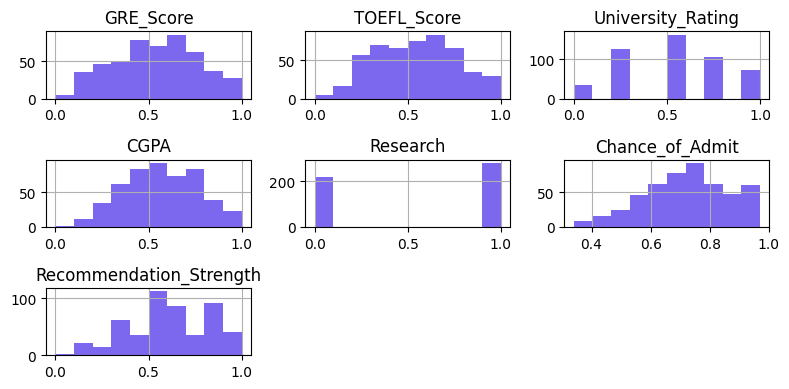

In [56]:
data.hist(bins=10, figsize=(8, 4),color=['mediumslateblue'])
plt.tight_layout()
plt.show()

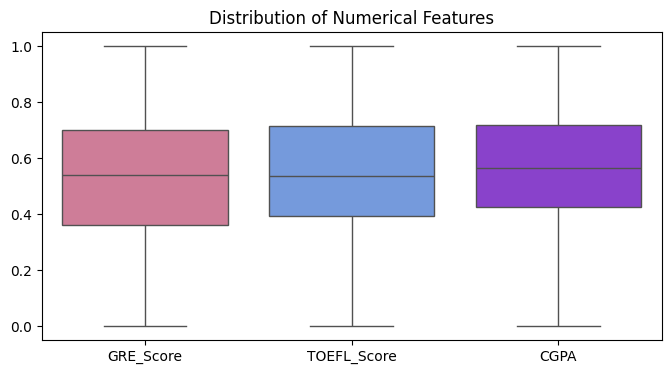

In [81]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data[['GRE_Score', 'TOEFL_Score', 'CGPA']],palette=['palevioletred', 'cornflowerblue', 'blueviolet'])
plt.title('Distribution of Numerical Features')
plt.show()

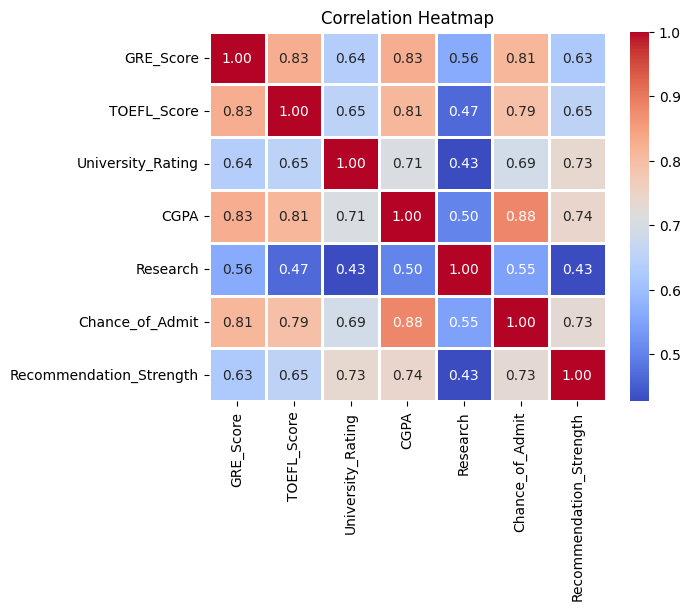

In [16]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\sidon\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


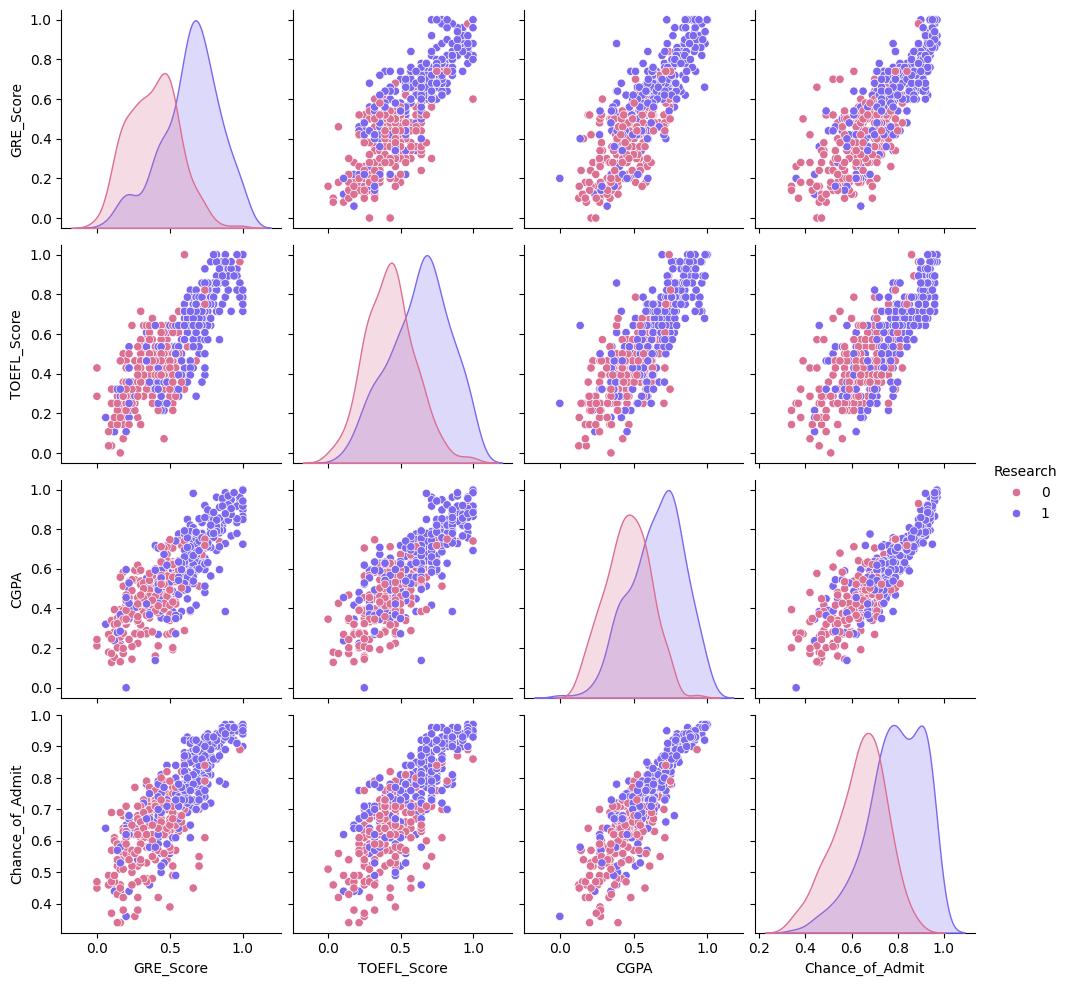

In [63]:
sns.pairplot(data, vars=['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit'], hue='Research',palette=['palevioletred','mediumslateblue'])
plt.show()

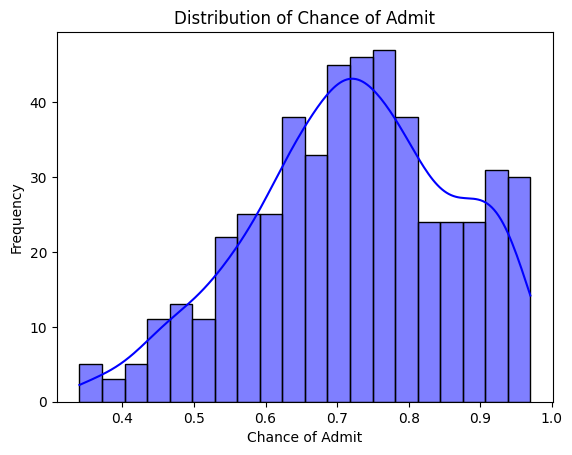

In [65]:
sns.histplot(data['Chance_of_Admit'], kde=True, bins=20, color='blue')
plt.title('Distribution of Chance of Admit')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.show()

C:\Users\sidon\AppData\Local\Temp\ipykernel_26352\201885929.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Research', y='Chance_of_Admit', data=data, palette='viridis')


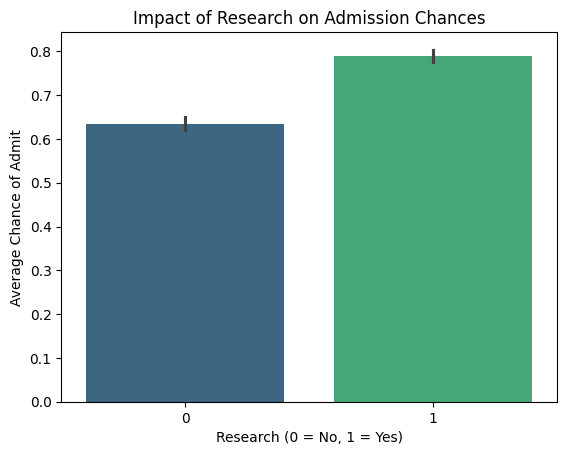

In [76]:
sns.barplot(x='Research', y='Chance_of_Admit', data=data, palette='viridis')
plt.title('Impact of Research on Admission Chances')
plt.xlabel('Research (0 = No, 1 = Yes)')
plt.ylabel('Average Chance of Admit')
plt.show()

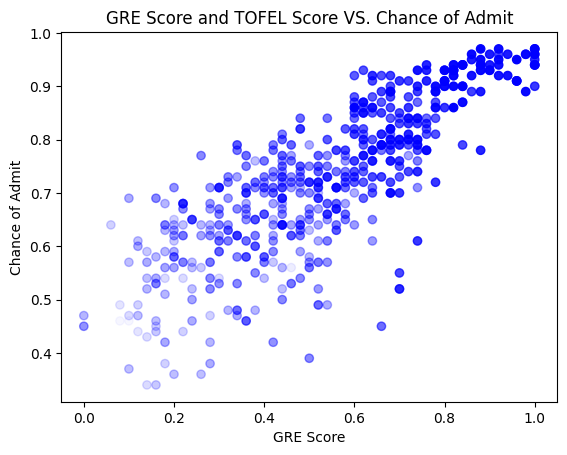

In [ ]:
plt.scatter(data['GRE_Score'], data['Chance_of_Admit'], alpha=data['TOEFL_Score'], color='blue')
plt.title('GRE Score and TOFEL Score VS. Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()


Data in Research = 0 are less concentrated. Typically students with research = 1 will have higher CGPA score

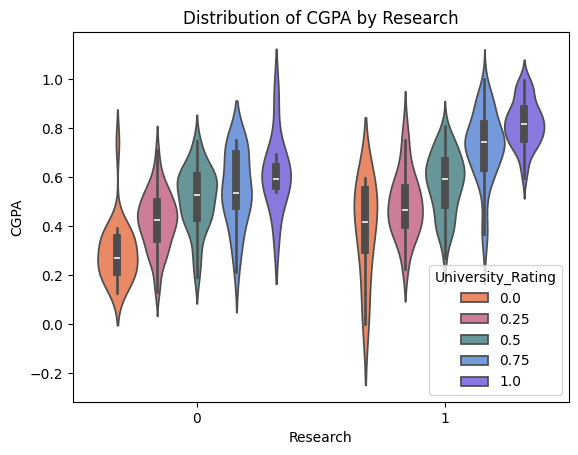

In [87]:
sns.violinplot(x='Research', y='CGPA', hue=data['University_Rating'],data=data, palette=['coral','palevioletred','cadetblue', 'cornflowerblue', 'mediumslateblue'])
plt.title('Distribution of CGPA by Research')
plt.show()

#  Splitting Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (400, 6)
Test feature set size: (100, 6)
Training variable set size: (400,)
Test variable set size: (100,)


#  Linear Regression model

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
cdf = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=["Coefficients"])
cdf


,Coefficients
GRE_Score,0.120878
TOEFL_Score,0.079370
University_Rating,0.005973
CGPA,0.351387
Research,0.023945
Recommendation_Strength,0.081073


In [26]:
y_pred= lr.predict(X_test)
lr_mse = mean_squared_error(y_test,y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test,y_pred)
lr_r2 = r2_score(y_test,y_pred)
# Metrics
print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R² Score:", lr_r2)

Mean Squared Error (MSE): 0.0037249912713073745
Root Mean Squared Error (RMSE): 0.061032706570390394
Mean Absolute Error (MAE): 0.042916036314176405
R² Score: 0.8178488375888815


In [27]:
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print("Cross-Validation RMSE:", cv_rmse)
print("Mean CV RMSE:", np.mean(cv_rmse))


Cross-Validation RMSE: [0.05891272 0.06824141 0.05982442 0.06412982 0.05145248]
Mean CV RMSE: 0.06051217104273032


In [28]:
ridge = Ridge()
ridge_params={}
ridge_params['alpha'] =  np.array([1,10, 100])
ridge_params['fit_intercept'] = np.array([False, True])
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)


for key, value in ridge_cv.cv_results_.items():
        print(key, value)
ridge_cv.best_params_

mean_fit_time [0.00480018 0.00488195 0.00229325 0.00120821 0.00123391 0.00121531]
std_fit_time [0.00248168 0.00258345 0.00050973 0.0004043  0.00046797 0.00041729]
mean_score_time [0.00239968 0.00283194 0.00121236 0.00141191 0.00120168 0.00120282]
std_score_time [0.00048988 0.00114701 0.00040484 0.00048714 0.0003991  0.00039845]
param_alpha [1 1 10 10 100 100]
param_fit_intercept [False True False True False True]
params [{'alpha': 1, 'fit_intercept': False}, {'alpha': 1, 'fit_intercept': True}, {'alpha': 10, 'fit_intercept': False}, {'alpha': 10, 'fit_intercept': True}, {'alpha': 100, 'fit_intercept': False}, {'alpha': 100, 'fit_intercept': True}]
split0_test_score [-0.01537341 -0.0034001  -0.01678374 -0.00391908 -0.0329746  -0.00853416]
split1_test_score [-0.01524091 -0.00459886 -0.01817949 -0.00496122 -0.03988655 -0.0081403 ]
split2_test_score [-0.01410469 -0.00365457 -0.01691033 -0.00433821 -0.03073522 -0.00935515]
split3_test_score [-0.01561733 -0.00418055 -0.01775013 -0.0048458  -

{'alpha': 1, 'fit_intercept': True}

C:\Users\sidon\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


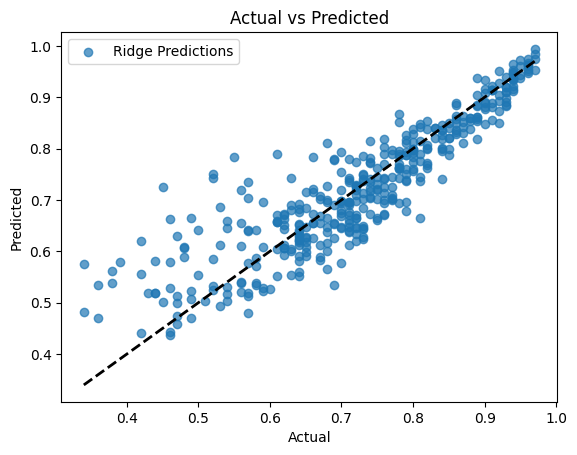

In [91]:
ridge_best = ridge_cv.best_estimator_
ridge_pred = ridge_best.predict(X_test)
plt.scatter(y_test, ridge_pred, alpha=0.7, label="Ridge Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [30]:
ridge_mse = mean_squared_error(y_test,ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test,ridge_pred)
ridge_mae = mean_absolute_error(y_test,ridge_pred)
print("Mean Squared Error (MSE):", ridge_mse)
print("Root Mean Squared Error (RMSE):", ridge_rmse)
print("Mean Absolute Error (MAE):", ridge_mae)
print("R² Score:", ridge_r2)

Mean Squared Error (MSE): 0.003779133856707026
Root Mean Squared Error (RMSE): 0.06147466028134703
Mean Absolute Error (MAE): 0.043387968998444305
R² Score: 0.8152012784006345


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004800      0.002482         0.002400        0.000490           1   
1       0.004882      0.002583         0.002832        0.001147           1   
2       0.002293      0.000510         0.001212        0.000405          10   
3       0.001208      0.000404         0.001412        0.000487          10   
4       0.001234      0.000468         0.001202        0.000399         100   

  param_fit_intercept                                  params  \
0               False    {'alpha': 1, 'fit_intercept': False}   
1                True     {'alpha': 1, 'fit_intercept': True}   
2               False   {'alpha': 10, 'fit_intercept': False}   
3                True    {'alpha': 10, 'fit_intercept': True}   
4               False  {'alpha': 100, 'fit_intercept': False}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0          -0.015373          -0.015241          -0.0

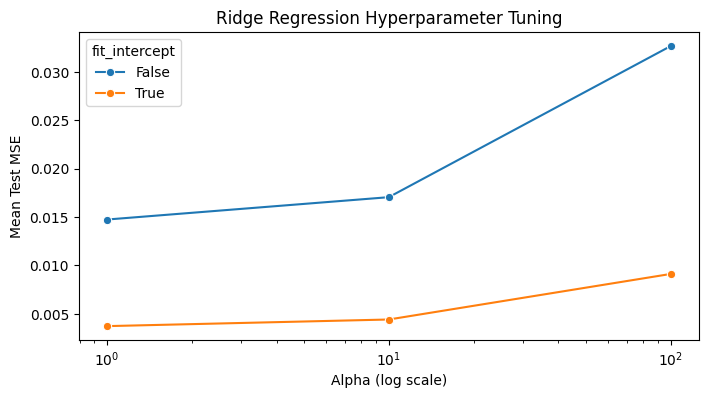

In [31]:
cv_results = ridge_cv.cv_results_

cv_results_df = pd.DataFrame(cv_results)
params = cv_results['params']
mean_test_scores = -cv_results['mean_test_score'] 

cv_results_df['mean_test_mse'] = -cv_results_df['mean_test_score']
print(cv_results_df.head())

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=cv_results_df,
    x='param_alpha',  
    y='mean_test_mse',  
    hue='param_fit_intercept',  
    marker='o'
)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Test MSE')
plt.title('Ridge Regression Hyperparameter Tuning')
plt.legend(title='fit_intercept')
plt.show()

# Decision Tree model


In [32]:
dtree = DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [33]:
dr_mse = mean_squared_error(y_test, y_pred)
dr_rmse = np.sqrt(dr_mse)
dr_mae = mean_absolute_error(y_test, y_pred)
dr_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", dr_mse)
print("Root Mean Squared Error (RMSE):", dr_rmse)
print("Mean Absolute Error:", dr_mae)
print("R² Score:", dr_r2)

Mean Squared Error: 0.0037249912713073745
Root Mean Squared Error (RMSE): 0.061032706570390394
Mean Absolute Error: 0.042916036314176405
R² Score: 0.8178488375888815


# Random forest model

Best n_estimators: 600
Cross-validation MSE for each n_estimators: [0.004399875500000002, 0.004313137724999999, 0.004314512012500006, 0.004309030913888878, 0.004274110179999994, 0.004272023947916673, 0.0042785349120000316]


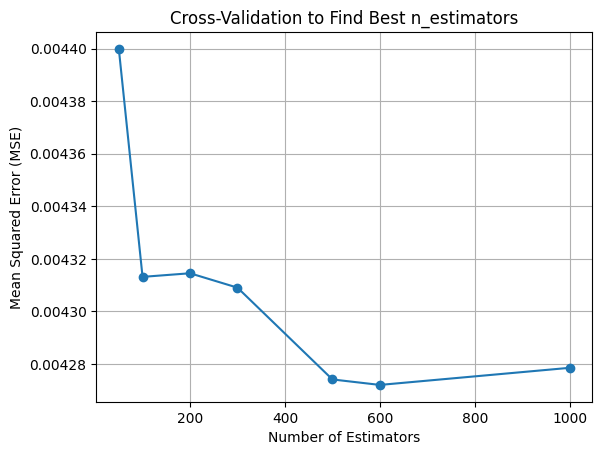

In [ ]:
n_estimators_range = [50, 100, 200, 300, 500, 600,1000]
cv_scores = []
for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  
    cv_scores.append(-scores.mean())  # Convert to MSE

best_n = n_estimators_range[np.argmin(cv_scores)]  

print("Best n_estimators:", best_n)
print("Cross-validation MSE for each n_estimators:", cv_scores)

# Plot the results
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation to Find Best n_estimators')
plt.grid(True)
plt.show()


In [35]:
rfc = RandomForestRegressor(n_estimators=best_n)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=600)

In [36]:
y_pred = rfc.predict(X_test)

In [37]:
rfc_mse = mean_squared_error(y_test, y_pred)
rfc_rmse = np.sqrt(rfc_mse)
rfc_mae = mean_absolute_error(y_test, y_pred)
rfc_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", rfc_mse)
print("Root Mean Squared Error (RMSE):", rfc_rmse)
print("Mean Absolute Error (MAE):", rfc_mae)
print("R² Score:", rfc_r2)

Mean Squared Error (MSE): 0.0041851218944444326
Root Mean Squared Error (RMSE): 0.06469251807160108
Mean Absolute Error (MAE): 0.043476333333333235
R² Score: 0.7953485626188542


# Gradient Boosting model


In [38]:
param =  {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 0.2],
          'max_depth': [2, 3, 5],
          'subsample': [0.6, 0.8, 1.0]}

gb = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb, param_grid=param, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

print("Chosen Parameters:", grid_search.best_params_)
print("High R² Score:", grid_search.best_score_)

best_gb = grid_search.best_estimator_

y_pred = best_gb.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", gb_mse)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R² Score:", gb_r2)


Chosen Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.8}
High R² Score: 0.7866569736329113
Mean Squared Error (MSE): 0.0037558677912795714
Root Mean Squared Error (RMSE): 0.06128513515755327
Mean Absolute Error (MAE): 0.042499393060798425
R² Score: 0.8163389833115124


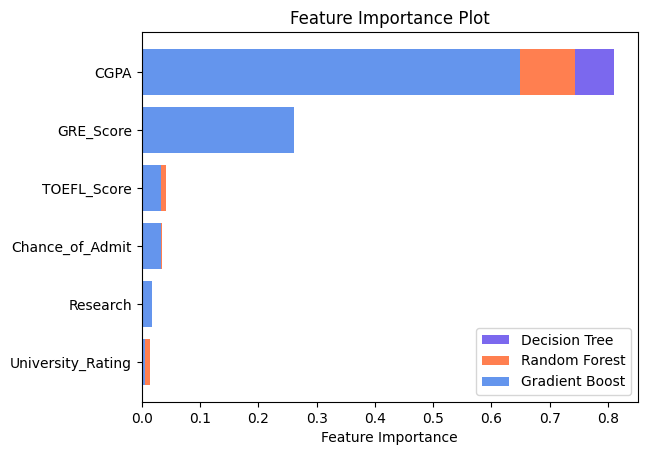

In [104]:
col=data.columns

feature_importances = dtree.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx],label='Decision Tree',color='mediumslateblue')
plt.yticks(range(len(sorted_idx)), np.array(col)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')

feature_importances = rfc.feature_importances_
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx],label='Random Forest',color='coral')
plt.yticks(range(len(sorted_idx)), np.array(col)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')

feature_importances = best_gb.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx],label='Gradient Boost',color='cornflowerblue')
plt.yticks(range(len(sorted_idx)), np.array(col)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.legend()
plt.show()

# SVR model

In [120]:

param_grid = {
    'kernel': ['linear', 'rbf'], 
    'C': [0.1, 1, 10, 100],       
    'epsilon': [0.01, 0.1, 0.2]    
}

svrmodel = SVR()
grid_search = GridSearchCV(svrmodel, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
svr = grid_search.best_estimator_


y_pred=svr.predict(X_test)
print('predicted value for v=svrmodel is :',y_pred[:5])


svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", svr_mse)
print("Root Mean Squared Error (RMSE):", svr_rmse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R² Score:", svr_r2)



Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}
predicted value for v=svrmodel is : [0.95452749 0.81060008 0.67211362 0.76635023 0.64131275]
Mean Squared Error (MSE): 0.0042262820440570085
Root Mean Squared Error (RMSE): 0.0650098611293472
Mean Absolute Error (MAE): 0.04428952081688857
R² Score: 0.7916710177427904


C:\Users\sidon\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


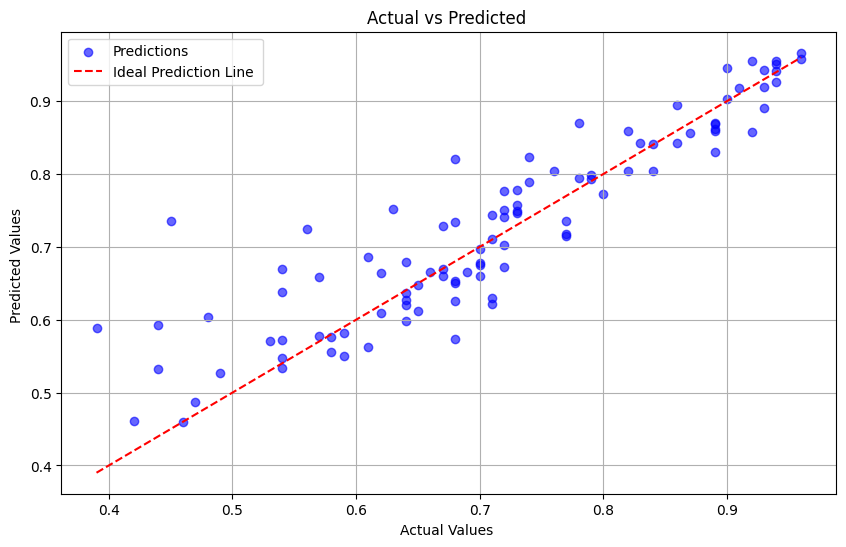

In [41]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Prediction Line ")
plt.xlabel("Actual Values ")
plt.ylabel("Predicted Values ")
plt.title("Actual vs Predicted ")
plt.legend()
plt.grid(True)

In [42]:
models = {"Linear Regression":[lr_mse,lr_rmse,lr_r2,lr_mae],"Ridge":[ridge_mse,ridge_rmse,ridge_r2,ridge_mae],
          "Decision Tree":[dr_mse,dr_rmse,dr_r2,dr_mae],"Random Forest" : [rfc_mse,rfc_rmse,rfc_r2,rfc_mae],
          "Gradient Boosting":[gb_mse,gb_rmse,gb_r2,gb_mae], "Support Vector":[svr_mse,svr_rmse,svr_r2,svr_mae]}
com_df = pd.DataFrame(models,index=['MSE','RMSE','R²','MAE'])
com_df


,Linear Regression,Ridge,Decision Tree,Random Forest,Gradient Boosting,Support Vector
MSE,0.003725,0.003779,0.003725,0.004185,0.003756,0.003887
RMSE,0.061033,0.061475,0.061033,0.064693,0.061285,0.062348
R²,0.817849,0.815201,0.817849,0.795349,0.816339,0.809913
MAE,0.042916,0.043388,0.042916,0.043476,0.042499,0.042135


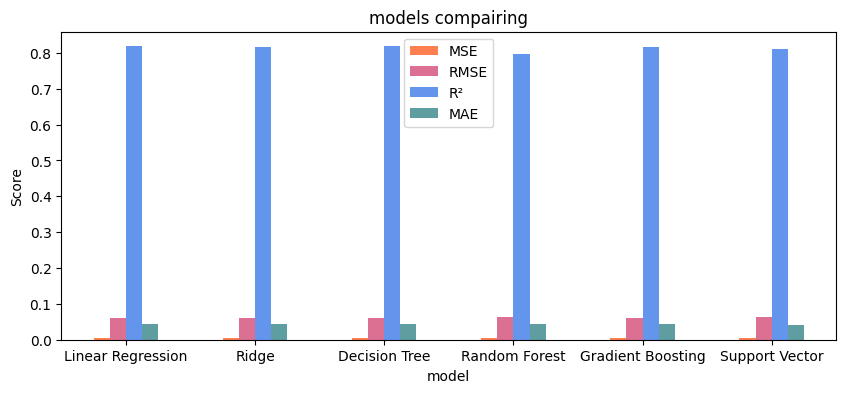

In [112]:
com_df.T.plot(kind = 'bar',figsize=(10,4),color=['coral','palevioletred','cornflowerblue', 'cadetblue', 'mediumslateblue'])
plt.title("models compairing")
plt.ylabel("Score")
plt.xlabel("model")
plt.xticks(rotation=0)
plt.show()

In [44]:
best_model = min(models, key=lambda x: models[x][0]) and min(models, key=lambda x: models[x][1]) and min(models, key=lambda x: models[x][3]) and max(models, key=lambda x: models[x][2])
print(f"The best model: {best_model}")

The best model: Linear Regression


# Test model on test set

In [113]:
test_set=pd.read_csv('Admission_Predict_Ver.csv')
test_set.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
test_set['Recommendation_Strength'] = (test_set['SOP'] + test_set['LOR']) / 2
test_set.drop(columns=['SOP' ,'LOR'], inplace=True)
test_set.drop(columns=['Serial_No'], inplace=True)
test_set.head()


,GRE_Score,TOEFL_Score,University_Rating,CGPA,Research,Chance_of_Admit,Recommendation_Strength
0,337,118,4,9.65,1,0.92,4.50
1,324,107,4,8.87,1,0.76,4.25
2,316,104,3,8.00,1,0.72,3.25
3,322,110,3,8.67,1,0.80,3.00
4,314,103,2,8.21,0,0.65,2.50


In [ ]:

X_test = test_set.drop('Chance_of_Admit',axis=1)
y_test = test_set['Chance_of_Admit']
X_test= scaler.fit_transform(X_test) 

predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse= np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mse)
print("R² Score:", r2)




Mean Squared Error (MSE): 0.0040904410148379835
Root Mean Squared Error (RMSE): 0.06395655568304147
Mean Absolute Error (MAE): 0.0040904410148379835
R² Score: 0.7983671215690283


C:\Users\sidon\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


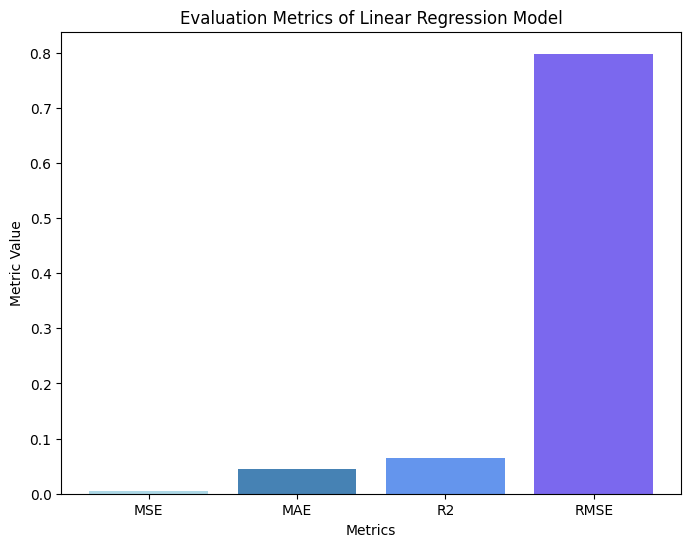

In [48]:
metrics = {'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(),sorted( metrics.values()), color=['lightblue', 'steelblue', 'cornflowerblue', 'mediumslateblue'])
plt.title("Evaluation Metrics of Linear Regression Model")
plt.ylabel("Metric Value")
plt.xlabel("Metrics")
plt.show()

# Check for overfitting

In [49]:
measures = {"train measures":[lr_mse,lr_rmse,lr_r2,lr_mae],"test measures":[mse,rmse,r2,mae]}
check_overfit = pd.DataFrame(measures,index=['MSE','RMSE','R²','MAE'])
check_overfit



,train measures,test measures
MSE,0.003725,0.004090
RMSE,0.061033,0.063957
R²,0.817849,0.798367
MAE,0.042916,0.045484


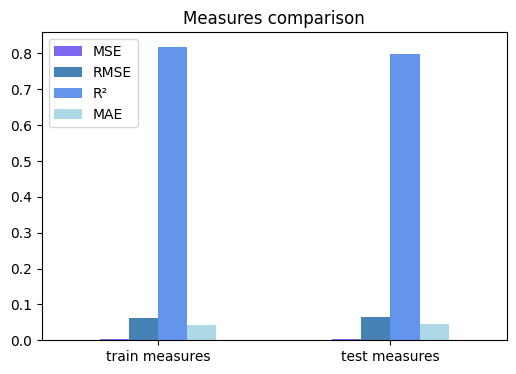

In [121]:
check_overfit.T.plot(kind = 'bar',figsize=(6,4),color=['mediumslateblue', 'steelblue', 'cornflowerblue', 'lightblue'])
plt.title("Measures comparison")
plt.xticks(rotation=0)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


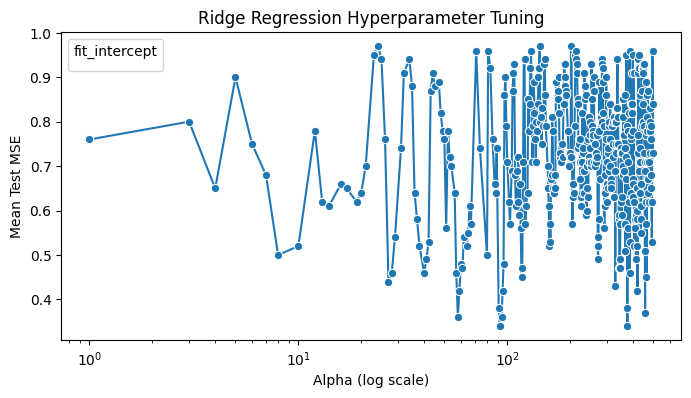

In [117]:
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=X_train,
    x=X_train.index,  
    y=y_train,  
    marker='o'
)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Test MSE')
plt.title('Ridge Regression Hyperparameter Tuning')
plt.legend(title='fit_intercept')
plt.show()